<a href="https://colab.research.google.com/github/youssefbourais0310/Neural_Networks/blob/main/stage_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Unzip the uploaded data into google drive 
!unzip "/content/drive/MyDrive/train_ragnarr.zip" -d "/content/drive/MyDrive/1_Project_stage/"

In [3]:
#import tensorflow into colab
import tensorflow as tf
import tensorflow_hub as hub 
print("TF version:", tf.__version__)
print("TF hub version :", hub.__version__)

#check for GPU avaibility
print("GPU", "avaibility : (YES )" if tf.config.list_physical_devices("GPU") else "not available ")

TF version: 2.8.0
TF hub version : 0.12.0
GPU avaibility : (YES )


In [4]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/csv.csv")
df
df1 = df.drop('Unnamed: 0', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [5]:
# checkout the lables of our data
labels_csv = df1

In [6]:
labels_csv 

,id,breed
0,f601766d-adb7-4aee-b8e9-c1693667d3f8,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
1,7f87540d-092f-4d1e-933b-10ac5bacbfac,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
2,cad9ae7b-2918-438a-a2fb-bd6abd5eb69f,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
3,9f70c3e7-1370-47c2-aa75-6c7378bccc63,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
4,52ba896b-bbd1-4456-b281-4e6d578c0c12,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
...,...,...
22589,960b6c77-c800-43fb-818d-330577bef239,Plantae_Tracheophyta_Liliopsida_Alismatales_Ar...
22590,97c4cad8-4ed2-446a-9c9b-9ce3656ab6d1,Plantae_Tracheophyta_Liliopsida_Alismatales_Ar...
22591,c036fd80-99e5-47d6-a805-0a017cbeb199,Plantae_Tracheophyta_Liliopsida_Alismatales_Ar...
22592,05eee851-dda2-4807-adec-9c32e4d1292f,Plantae_Tracheophyta_Liliopsida_Alismatales_Ar...


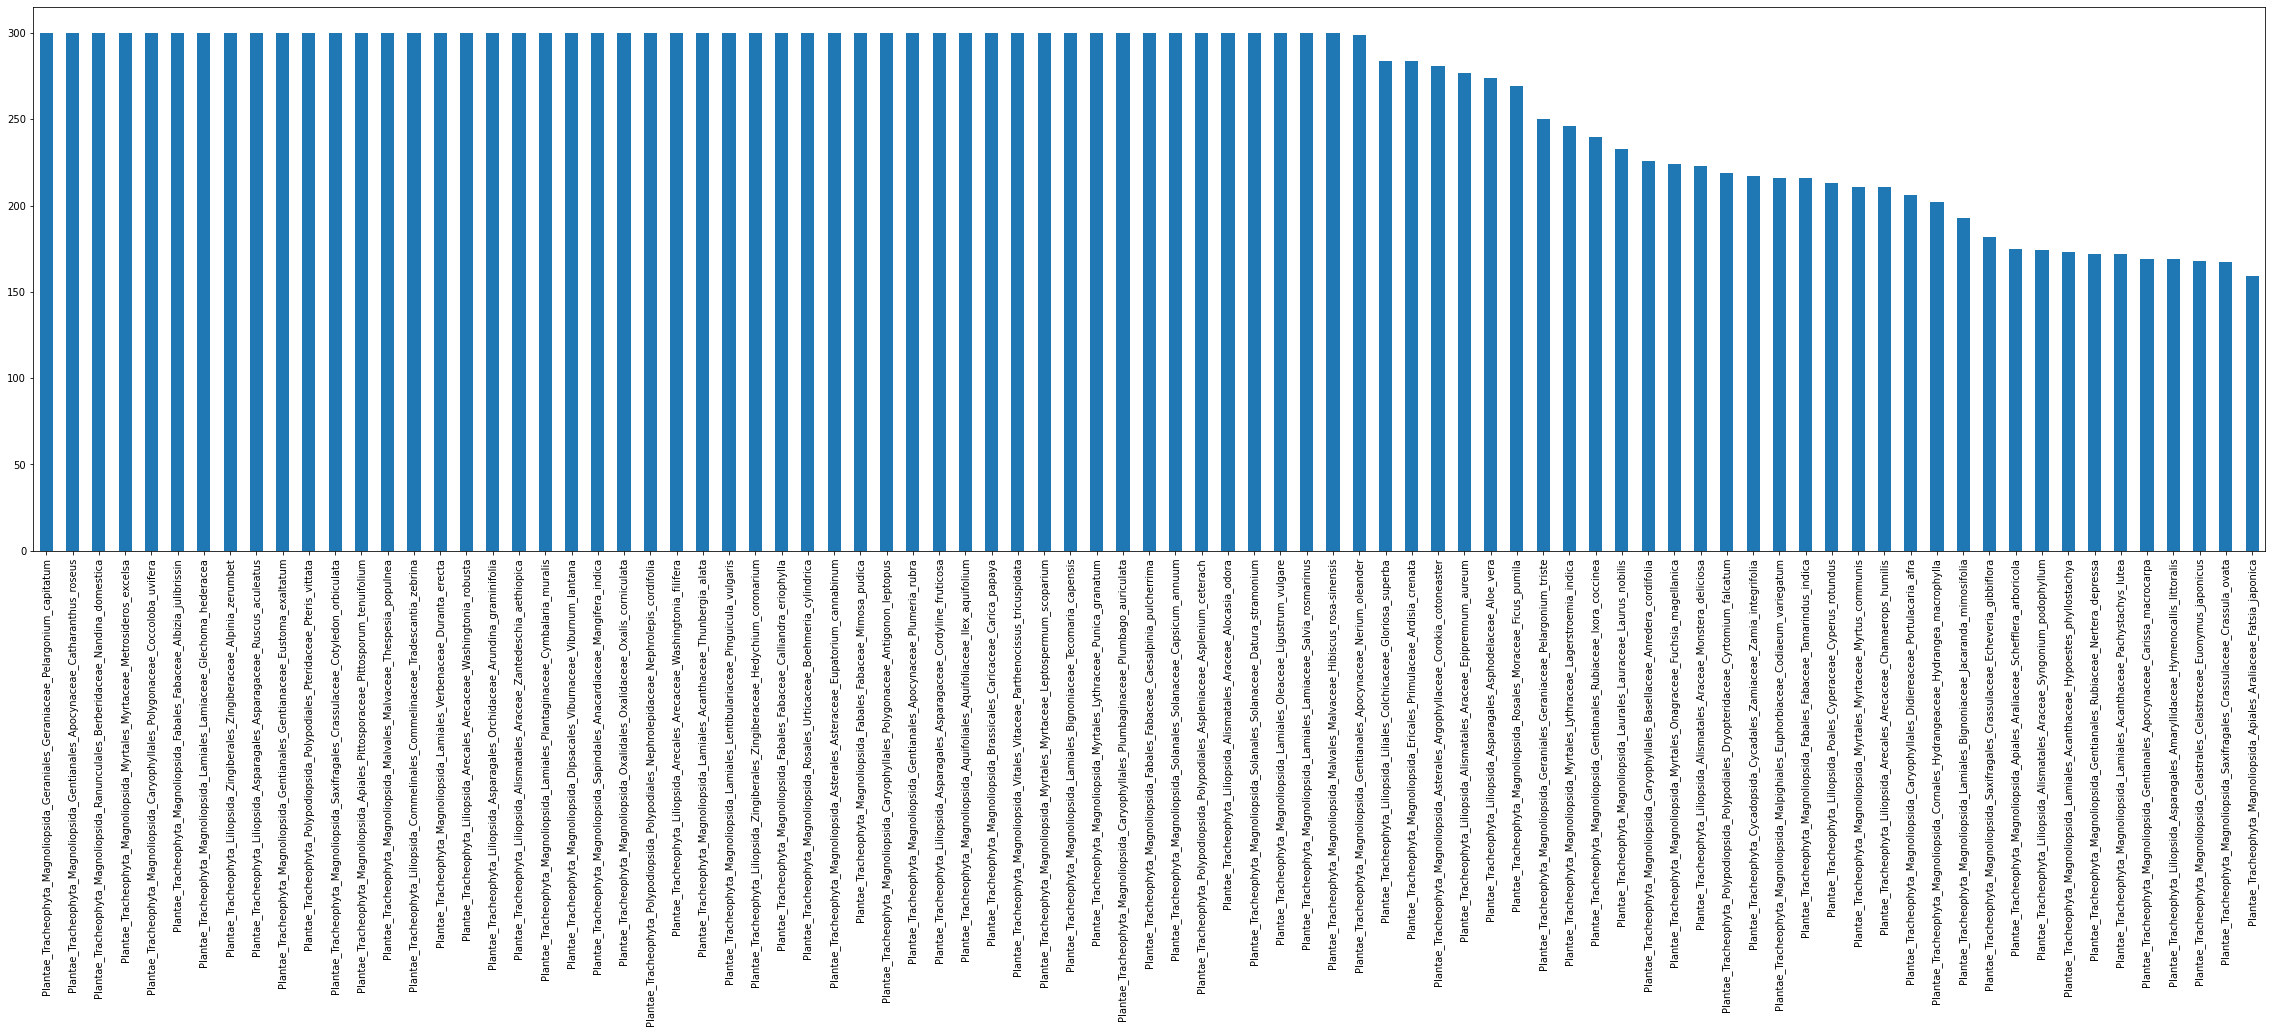

In [7]:
#how many images are there of each breed ?
labels_csv["breed"].value_counts().plot.bar(figsize=(40,10))

In [8]:
#how many images are there of each breed ?
a = labels_csv["breed"].value_counts()
len(a)

85

In [9]:
labels_csv["breed"].value_counts().median()

300.0

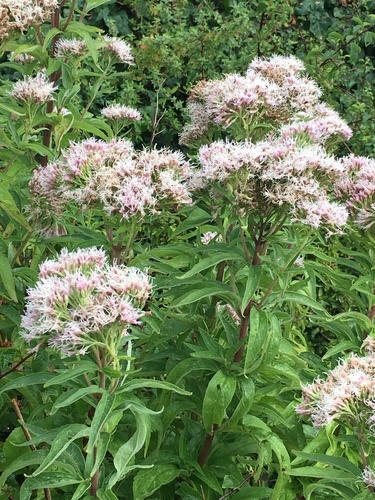

In [11]:
#lets view an image 
from IPython.display import Image 
Image("/content/drive/MyDrive/1_Project_stage/train_ragnar/0a0a54b9-eea9-4c67-8efe-0fe1c6d12219.jpg")

### getting images and their labels
lets get a list of all of our image file pathnames

In [12]:
#create pathnames from images ID 
filepaths = ["/content/drive/MyDrive/1_Project_stage/train_ragnar" + fpath + ".jpg" for fpath in labels_csv["id"]]

In [13]:
# check the first 10
filepaths[:10]

['/content/drive/MyDrive/1_Project_stage/train_ragnarf601766d-adb7-4aee-b8e9-c1693667d3f8.jpg',
 '/content/drive/MyDrive/1_Project_stage/train_ragnar7f87540d-092f-4d1e-933b-10ac5bacbfac.jpg',
 '/content/drive/MyDrive/1_Project_stage/train_ragnarcad9ae7b-2918-438a-a2fb-bd6abd5eb69f.jpg',
 '/content/drive/MyDrive/1_Project_stage/train_ragnar9f70c3e7-1370-47c2-aa75-6c7378bccc63.jpg',
 '/content/drive/MyDrive/1_Project_stage/train_ragnar52ba896b-bbd1-4456-b281-4e6d578c0c12.jpg',
 '/content/drive/MyDrive/1_Project_stage/train_ragnar7cba7f94-3b4c-4751-a7fb-2a697182deb2.jpg',
 '/content/drive/MyDrive/1_Project_stage/train_ragnar1be8906b-e271-4410-8dcb-319619ba8ed0.jpg',
 '/content/drive/MyDrive/1_Project_stage/train_ragnared24ac6d-cffa-496b-86e0-adeae71acf92.jpg',
 '/content/drive/MyDrive/1_Project_stage/train_ragnar53e46a9f-cdff-412c-95c3-e92a44dffd78.jpg',
 '/content/drive/MyDrive/1_Project_stage/train_ragnar3c1f88cc-b02a-42c5-882b-ec7dd3e1c026.jpg']

In [14]:
len(filepaths)

22594

In [15]:
# check whether of filenames matches number of actual image files 
import os 
if len(os.listdir("/content/drive/MyDrive/1_Project_stage/train_ragnar")) == len(filepaths):
  print("filepaths match actual amount of files ! proceed.")
else :
  print ("filepaths do not match actual amount of files , check the target directory.")

filepaths do not match actual amount of files , check the target directory.


In [17]:
len(filepaths)

22594

In [16]:
len(os.listdir("/content/drive/MyDrive/1_Project_stage/train_ragnar"))

22294

In [46]:
# one more check
A = os.listdir("/content/drive/MyDrive/train_ragnar")


In [48]:
import numpy as np
import pandas as pd


df88 = pd.DataFrame(A, columns = ['id'])

df88

,id
0,4ae1804d-d6e6-47e3-8cf8-847694838671.jpg
1,d3cc765c-3291-44f2-8f5b-2ab60b43dfe3.jpg
2,c93164ff-b632-4697-944b-b7505c710154.jpg
3,328884ff-d3d2-474a-ab90-a7a7a5fe92f2.jpg
4,471bd7b6-252c-4555-b612-c0f867770739.jpg
...,...
22290,ee7a1692-0b58-4271-84f4-682ce320a5c1.jpg
22291,cb2e208b-d896-4bd2-902c-cbd12e83cf04.jpg
22292,98cc38e5-0463-4ff9-a675-fcfb17002a32.jpg
22293,26ed3b24-570a-451c-8b49-7d1b9fbce12b.jpg


In [67]:
df99 = df88["id"]. str. replace(".jpg","") 
df99

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0        4ae1804d-d6e6-47e3-8cf8-847694838671
1        d3cc765c-3291-44f2-8f5b-2ab60b43dfe3
2        c93164ff-b632-4697-944b-b7505c710154
3        328884ff-d3d2-474a-ab90-a7a7a5fe92f2
4        471bd7b6-252c-4555-b612-c0f867770739
                         ...                 
22290    ee7a1692-0b58-4271-84f4-682ce320a5c1
22291    cb2e208b-d896-4bd2-902c-cbd12e83cf04
22292    98cc38e5-0463-4ff9-a675-fcfb17002a32
22293    26ed3b24-570a-451c-8b49-7d1b9fbce12b
22294    1dee0c2b-3039-4efb-a2cf-b90e04a374ca
Name: id, Length: 22295, dtype: object

In [70]:
df88

,id
0,4ae1804d-d6e6-47e3-8cf8-847694838671.jpg
1,d3cc765c-3291-44f2-8f5b-2ab60b43dfe3.jpg
2,c93164ff-b632-4697-944b-b7505c710154.jpg
3,328884ff-d3d2-474a-ab90-a7a7a5fe92f2.jpg
4,471bd7b6-252c-4555-b612-c0f867770739.jpg
...,...
22290,ee7a1692-0b58-4271-84f4-682ce320a5c1.jpg
22291,cb2e208b-d896-4bd2-902c-cbd12e83cf04.jpg
22292,98cc38e5-0463-4ff9-a675-fcfb17002a32.jpg
22293,26ed3b24-570a-451c-8b49-7d1b9fbce12b.jpg


In [72]:
df88['id'] = df88['id'].str.split('.').str[0]

In [73]:
df88

,id
0,4ae1804d-d6e6-47e3-8cf8-847694838671
1,d3cc765c-3291-44f2-8f5b-2ab60b43dfe3
2,c93164ff-b632-4697-944b-b7505c710154
3,328884ff-d3d2-474a-ab90-a7a7a5fe92f2
4,471bd7b6-252c-4555-b612-c0f867770739
...,...
22290,ee7a1692-0b58-4271-84f4-682ce320a5c1
22291,cb2e208b-d896-4bd2-902c-cbd12e83cf04
22292,98cc38e5-0463-4ff9-a675-fcfb17002a32
22293,26ed3b24-570a-451c-8b49-7d1b9fbce12b


In [76]:
labels_csv

,id,breed
0,f601766d-adb7-4aee-b8e9-c1693667d3f8,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
1,7f87540d-092f-4d1e-933b-10ac5bacbfac,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
2,cad9ae7b-2918-438a-a2fb-bd6abd5eb69f,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
3,9f70c3e7-1370-47c2-aa75-6c7378bccc63,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
4,52ba896b-bbd1-4456-b281-4e6d578c0c12,Plantae_Tracheophyta_Magnoliopsida_Gentianales...
...,...,...
22589,960b6c77-c800-43fb-818d-330577bef239,Plantae_Tracheophyta_Liliopsida_Alismatales_Ar...
22590,97c4cad8-4ed2-446a-9c9b-9ce3656ab6d1,Plantae_Tracheophyta_Liliopsida_Alismatales_Ar...
22591,c036fd80-99e5-47d6-a805-0a017cbeb199,Plantae_Tracheophyta_Liliopsida_Alismatales_Ar...
22592,05eee851-dda2-4807-adec-9c32e4d1292f,Plantae_Tracheophyta_Liliopsida_Alismatales_Ar...


In [77]:
import pandas as pd

df1 = pd.DataFrame({ 'Temp': [10, 20, 30, 40,50]})

df2 = pd.DataFrame({'Temp': [40, 30, 10, 20], 'T': [40, 30, 10, 20]})

In [80]:
df = df88.merge(labels_csv["id"], how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']

df

,id,_merge
1974,448babed-2c53-47e6-965c-388e34c9073e,left_only
